# Classificação Multiclasse de desvio dos estudantes

## Conjunto de dados

Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de vários bancos de dados distintos) relacionado a alunos matriculados em diferentes cursos de graduação, como agronomia, design, pedagogia, enfermagem, jornalismo, administração, serviço social e tecnologias. O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno (trajetória acadêmica, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos alunos ao final do primeiro e segundo semestres. Os dados são usados para construir modelos de classificação para prever a evasão e o sucesso acadêmico dos alunos. O problema é formulado como uma tarefa de classificação de três categorias, na qual há um forte desequilíbrio em relação a uma das classes.

## Carregando os dados

In [7]:
import pandas as pd

df_students = pd.read_csv("../data/dados_estudantes.csv")
df_students.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [8]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

## Exploração dos dados demográficos

In [9]:
df_students["Estado civil"].value_counts(normalize=True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [10]:
import plotly.express as px

hist_estado_civil = px.histogram(df_students, x="Idade na matrícula")
hist_estado_civil.show()

A maioria dos estudantes são jovens e solteiros

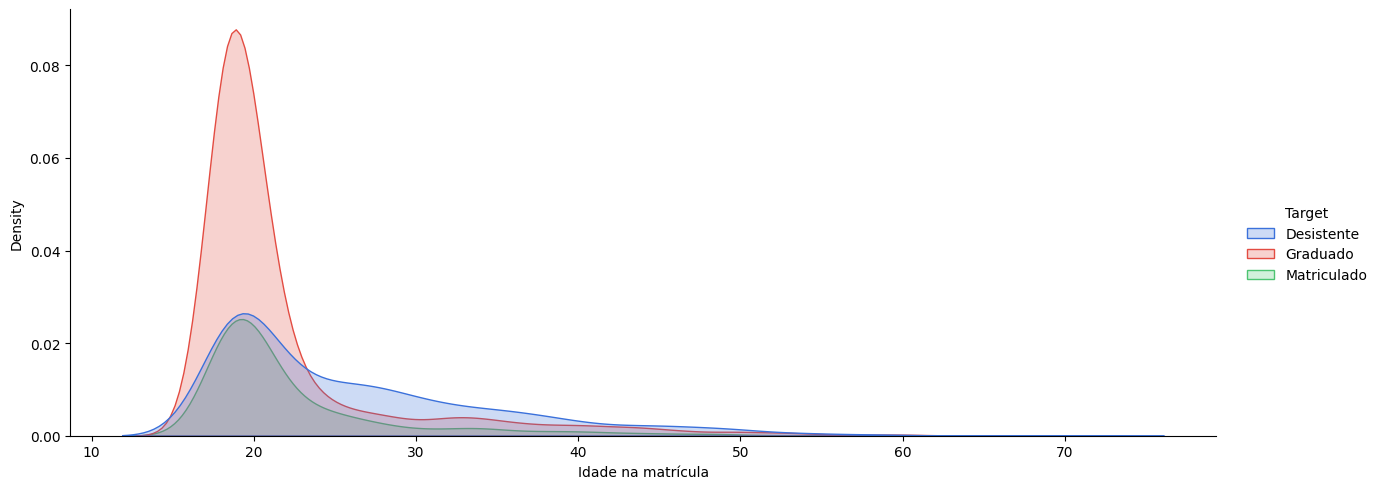

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = {"Desistente": "#3b71db", "Graduado": "#e34c42", "Matriculado": "#4dc471"}
sns.set_palette(list(color_dict.values()))

hist_idade_matricula_target = sns.displot(
    df_students, x="Idade na matrícula", hue="Target", kind="kde", fill=True, aspect=2.5
)
plt.show()

In [24]:
df_students["Estrangeiro"].value_counts(normalize=True)*100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [26]:
df_students["Sexo"].value_counts(normalize=True)*100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

In [27]:
hist_sexo = px.histogram(df_students, x="Sexo", color="Target", barmode="group")
hist_sexo.show()